# 12.2. Sampling a given distribution with a Monte Carlo Markov chain

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

In [13]:
def P (x):
    return np.exp(-(x+2*np.cos(x)**2)**2)

def Generate_markov (x0, N):
    x = [x0]
    for i in range(1,N):
        x_test = x[-1] + np.random.uniform(-1., 1.)
        r = np.minimum(1., P(x_test)/P(x[i-1]))
        val = np.random.uniform(0,1.)
        if val <= r :
            x.append(x_test)
        else:
            x.append(x[-1])
    return np.asarray(x)

In [15]:
N = 10**6
x0 = np.random.uniform(-1.,1.)
x = Generate_markov (x0, N)

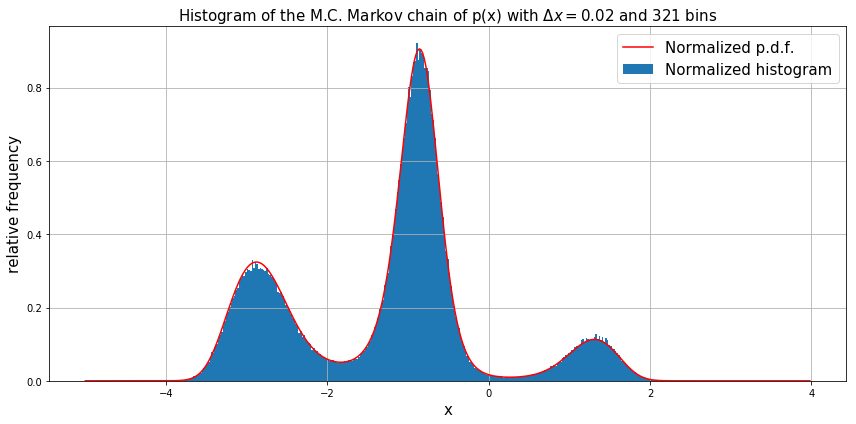

In [52]:
std = np.std(x)
mean = np.mean(x)

X = np.arange(-5,4,0.02)
n_bins = int((x.max()-x.min())/0.02)

fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(12,6)

plt.hist(x, bins = n_bins, density=True,  label='Normalized histogram')
plt.plot(X, P(X)/(0.02*np.sum(P(X))),'r-',label='Normalized p.d.f.')
#plt.plot([mean,mean],[0,1],'k--')
#plt.plot([mean-std,mean-std],[0,1],'k--')
#plt.plot([mean+std,mean+std],[0,1],'k--')
plt.xlabel('x',fontsize=15)
plt.ylabel('relative frequency',fontsize=15)
plt.title(f'Histogram of the M.C. Markov chain of p(x) with $\Delta x={0.02}$ and {n_bins} bins',fontsize=15)
plt.grid()
plt.legend(fontsize=15)


fig.tight_layout()
plt.show(fig)

In [43]:
x_elim = np.unique(x)
print('The number of unique values on the Markov chain is:\t\t', x_elim.shape[0])
print('The fraction of them w.r.t. the total lenght of the chain is:\t',x_elim.shape[0]/N)

The number of unique values on the Markov chain is:		 507168
The fraction of them w.r.t. the total lenght of the chain is:	 0.507168
